In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from ydata_profiling import ProfileReport
from imblearn.over_sampling import RandomOverSampler

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [15]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [16]:
data = pd.read_csv("survey lung cancer.csv")

In [17]:
profile = ProfileReport(data, title="Profiling Report - Risk for lung cancer")

In [18]:
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]


In [19]:
data[data.duplicated(keep=False)]


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
13,M,58,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
23,M,60,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
51,M,63,2,2,2,1,2,2,2,2,1,1,2,1,1,YES
75,M,58,2,1,1,1,1,1,2,2,2,2,1,1,1,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


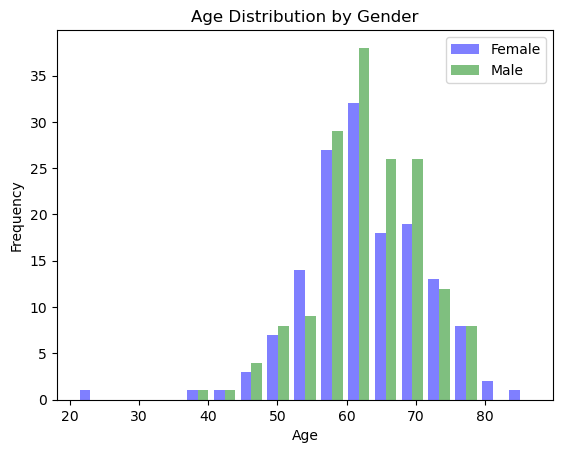

In [20]:
# Separate data by gender
female_age = data[data['GENDER'] == 'F']['AGE']
male_age = data[data['GENDER'] == 'M']['AGE']

# Create a histogram for each gender
plt.hist([female_age, male_age], bins=17, alpha=0.5, color=['blue', 'green'], label=['Female', 'Male'])

# Add labels and a legend
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.title('Age Distribution by Gender')
plt.show()

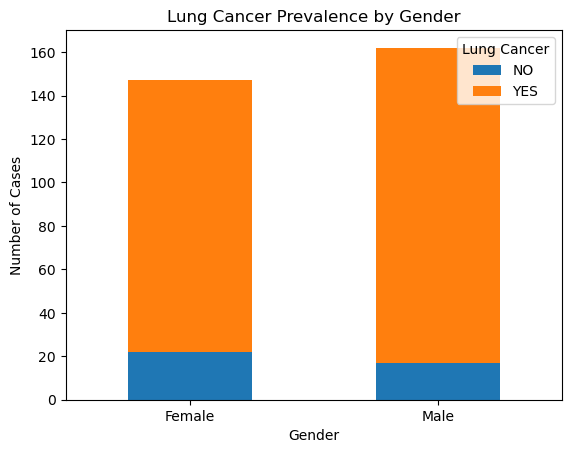

In [21]:
# Group data by gender and count the number of lung cancer cases
gender_lung_cancer_counts = data.groupby(['GENDER', 'LUNG_CANCER']).size().unstack(fill_value=0)

# Create a bar chart
ax = gender_lung_cancer_counts.plot(kind='bar', stacked=True, rot=0)

# Add labels and a legend
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.legend(title='Lung Cancer', loc='upper right')

# Set the x-axis labels to "Female" and "Male"
ax.set_xticklabels(['Female', 'Male'])

# Set the title
plt.title('Lung Cancer Prevalence by Gender')

# Show the plot
plt.show()

<Figure size 800x600 with 0 Axes>

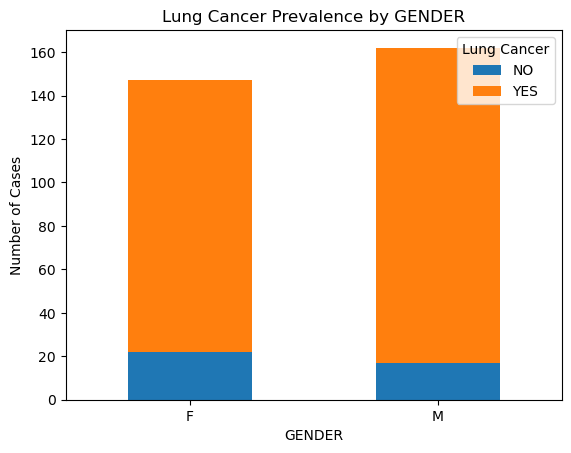

<Figure size 800x600 with 0 Axes>

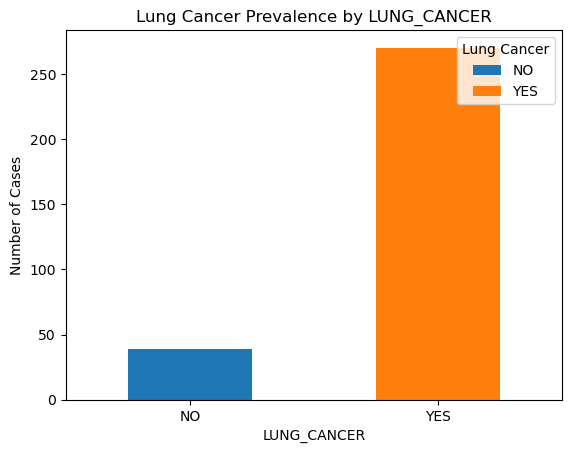

In [22]:
# Get a list of categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Create bar charts for each categorical column vs. Lung Cancer
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    counts = data.groupby([col, 'LUNG_CANCER']).size().unstack(fill_value=0)
    counts.plot(kind='bar', stacked=True, rot=0)
    plt.xlabel(col)
    plt.ylabel('Number of Cases')
    plt.legend(title='Lung Cancer', loc='upper right')
    plt.title(f'Lung Cancer Prevalence by {col}')
    plt.show()

In [23]:
encoder = LabelEncoder()
scaler=StandardScaler()

# Encoding
# Encode the 'LUNG_CANCER' column by transforming 'YES' and 'NO' to numerical values
data['LUNG_CANCER'] = encoder.fit_transform(data['LUNG_CANCER'])

# Encode the 'GENDER' column by transforming 'F' and 'M' to numerical values
data['GENDER'] = encoder.fit_transform(data['GENDER'])

# Scaling
data['AGE']=scaler.fit_transform(data[['AGE']])

In [24]:
# List of columns to transform
columns_to_transform = [col for col in data.columns if col not in ['AGE', 'GENDER', 'LUNG_CANCER']]

# Function to convert 2 to 1 and keep 1 as 1
def transform_values(x):
    return 1 if x == 2 else 0

# Apply the transformation to selected columns
data[columns_to_transform] = data[columns_to_transform].applymap(transform_values)

/var/folders/tm/mtcmj7j12tjdtqz09hh4tb3r0000gn/T/ipykernel_57005/49354975.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[columns_to_transform] = data[columns_to_transform].applymap(transform_values)


In [25]:
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,0.771850,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,1.381829,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,-0.448107,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,0.039876,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,0.039876,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,-0.814095,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,0.893846,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,-0.570103,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,0.527859,1,0,1,0,0,1,1,0,1,1,1,0,1,1


In [26]:
X = data.drop(columns=['LUNG_CANCER'])

y = data['LUNG_CANCER']

In [27]:
X, y = RandomOverSampler().fit_resample(X,y)

<Axes: >

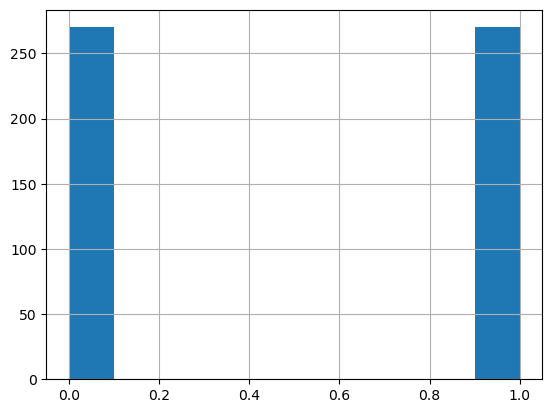

In [28]:
y.hist()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (324, 15)
Test shape: (216, 15)


In [30]:
X_train

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
144,1,0.161871,0,1,1,1,0,0,1,0,1,0,0,1,1
194,1,0.039876,0,0,0,0,1,1,1,0,1,1,1,0,1
408,0,-0.082120,0,0,0,0,1,1,0,0,0,0,1,0,0
420,1,0.649855,1,0,1,0,0,1,0,0,0,0,0,0,0
237,0,-1.058086,1,1,1,1,1,1,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0.405863,1,1,1,1,0,1,0,1,0,1,1,1,0
106,0,-0.204116,1,1,1,1,1,1,0,0,0,0,1,1,0
270,0,0.893846,1,0,0,0,0,1,0,0,0,0,1,0,0
435,0,0.039876,0,1,0,0,0,0,0,1,0,1,1,0,0


In [31]:
y_train

144    1
194    1
408    0
420    0
237    1
      ..
71     1
106    1
270    0
435    0
102    1
Name: LUNG_CANCER, Length: 324, dtype: int64

In [32]:
X_test

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
229,1,-0.692099,0,0,0,0,1,0,1,0,1,1,1,1,1
73,0,-0.326112,1,0,0,0,1,1,0,0,0,0,1,0,0
521,0,-0.448107,1,0,0,0,1,1,1,0,0,0,1,0,0
86,1,0.405863,0,1,1,0,1,0,1,0,1,1,1,0,1
469,0,0.039876,0,1,0,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,0,0.039876,0,0,0,0,1,1,0,0,0,0,1,0,0
203,0,0.283867,0,1,1,1,1,0,1,1,1,1,1,1,0
175,0,-0.448107,1,1,1,1,1,1,0,1,0,1,0,1,1
225,1,-0.448107,1,0,0,1,1,1,1,1,1,1,1,1,1


In [33]:
y_test

229    1
73     1
521    0
86     1
469    0
      ..
286    0
203    1
175    1
225    1
220    1
Name: LUNG_CANCER, Length: 216, dtype: int64

Classifier: Random Forest
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       103
           1       1.00      0.96      0.98       113

    accuracy                           0.98       216
   macro avg       0.98      0.98      0.98       216
weighted avg       0.98      0.98      0.98       216



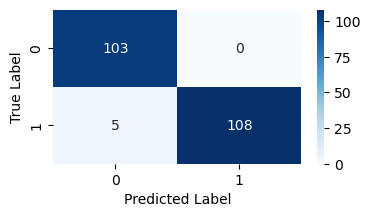



Classifier: Bagging
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       103
           1       1.00      0.91      0.95       113

    accuracy                           0.95       216
   macro avg       0.96      0.96      0.95       216
weighted avg       0.96      0.95      0.95       216



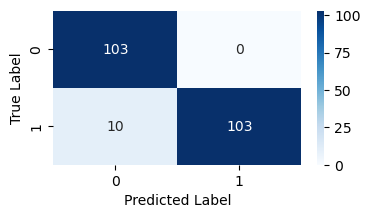



Classifier: SVM
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       103
           1       0.89      0.87      0.88       113

    accuracy                           0.88       216
   macro avg       0.87      0.88      0.87       216
weighted avg       0.88      0.88      0.88       216



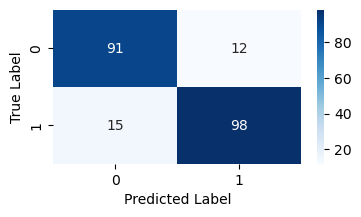



Classifier: AdaBoost
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       103
           1       0.89      0.96      0.92       113

    accuracy                           0.91       216
   macro avg       0.92      0.91      0.91       216
weighted avg       0.91      0.91      0.91       216



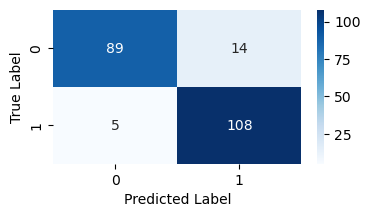

In [34]:
# Define the classifiers
classifiers = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Bagging', BaggingClassifier(random_state=42)),
    ('SVM', SVC(kernel='linear', random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42))
]

# Fit each classifier and calculate precision, recall, accuracy, and store confusion matrix and classification report
results = []

for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    results.append({'Classifier': name, 'Classification Report': report, 'Confusion Matrix': conf_matrix})

# Display the results and visualize confusion matrices
for result in results:
    print(f"Classifier: {result['Classifier']}")
    print(result['Classification Report'])
    
    # Visualize the confusion matrix
    plt.figure(figsize=(4, 2))
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    print("\n")

In [35]:
# Access the Random Forest classifier
random_forest_classifier = classifiers[0][1]  # This accesses the Random Forest classifier

# Get hyperparameters
rf_params = random_forest_classifier.get_params()

# Convert to DataFrame for better visualization, with parameters as rows
rf_params_df = pd.DataFrame(list(rf_params.items()), columns=['Parameter', 'Value'])

# Display the DataFrame
rf_params_df

,Parameter,Value
0,bootstrap,True
1,ccp_alpha,0.0
2,class_weight,None
3,criterion,gini
4,max_depth,None
5,max_features,sqrt
6,max_leaf_nodes,None
7,max_samples,None
8,min_impurity_decrease,0.0
9,min_samples_leaf,1


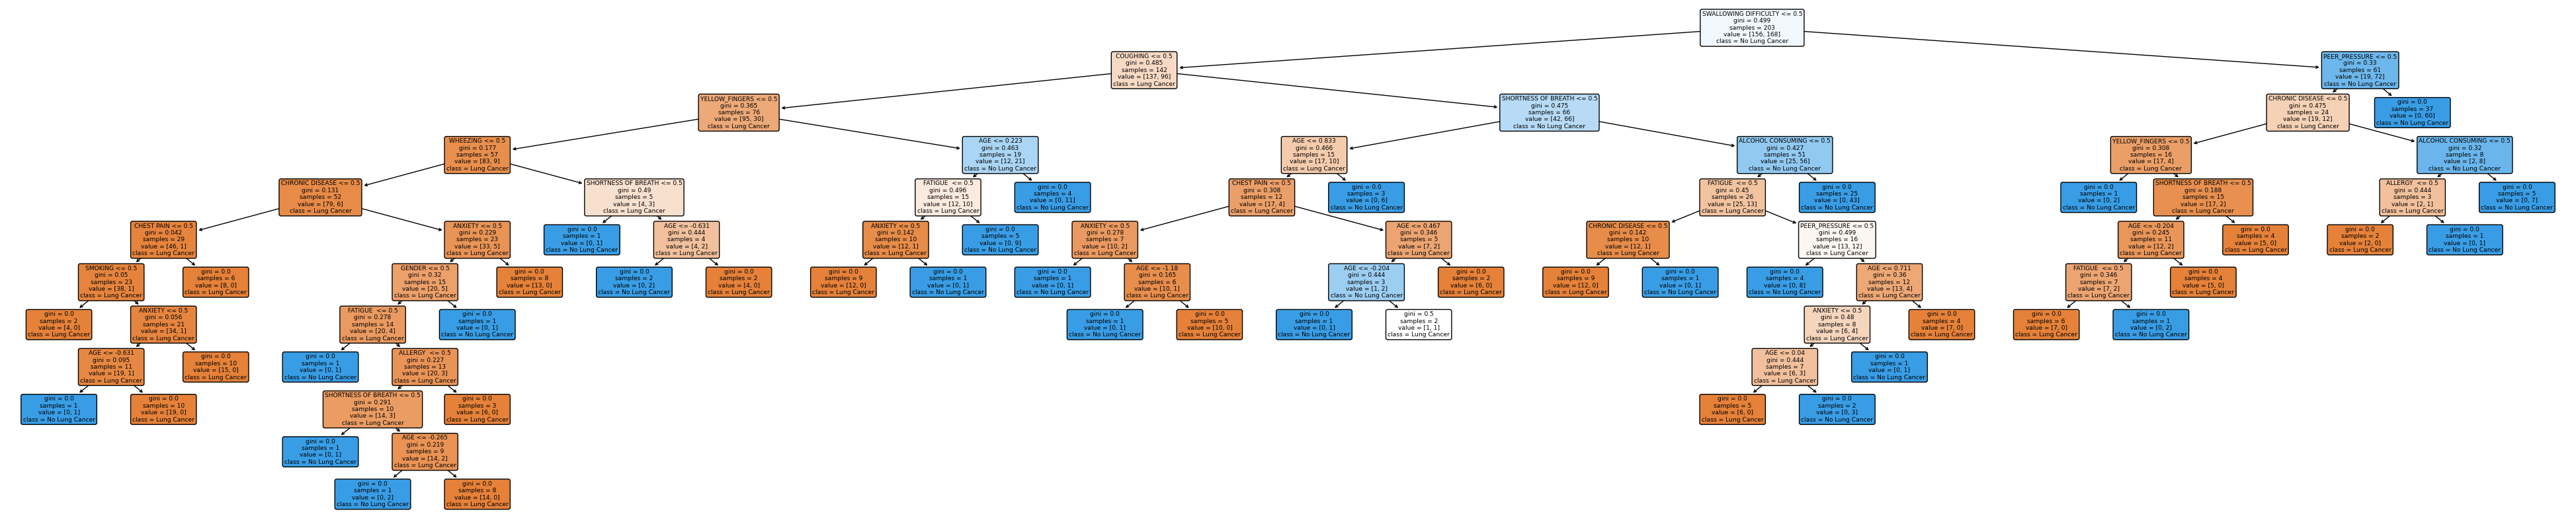

In [36]:
from sklearn.tree import plot_tree
# Select one tree from the forest
tree = random_forest_classifier.estimators_[0]

# Visualize the tree
plt.figure(figsize=(50,10))
plot_tree(tree, filled=True, feature_names=X_train.columns, class_names=['Lung Cancer', 'No Lung Cancer'], rounded=True)
plt.show()